In [3]:
library(tidyverse)
library(Seurat)
library(ggplot2)
library(patchwork)
library(ggbeeswarm)

options(ggrepel.max.overlaps = Inf)

Attaching SeuratObject



In [13]:
xe_obj = qs::qread('_targets/objects/exp_labelled_neuron')
xe_obj

An object of class Seurat 
59227 features across 107464 samples within 3 assays 
Active assay: SCT (26906 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

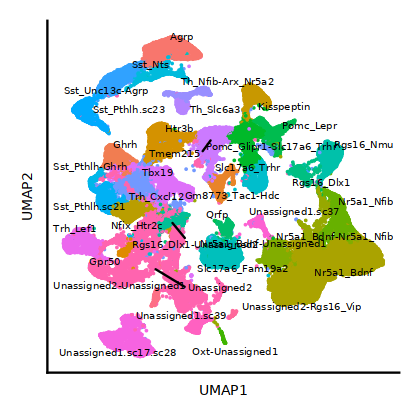

In [14]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
umap_neuron = DimPlot(xe_obj, pt.size= 0.0001, reduction = "umap", group.by = "labels", label = TRUE, repel = TRUE, raster=FALSE, label.size=2) +
theme(legend.position = "none")  +
labs(title = "Molecular cartography cells on snRNA-seq UMAP",
     x = 'UMAP1', y='UMAP2') + 
theme(plot.title = element_blank(),
#       plot.title = element_text(size = 8),
      axis.title.y = element_text(size=8),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.title.x = element_text(size=8),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank())
umap_neuron

In [15]:
xe_obj = qs::qread('_targets/objects/exp_labelled_other')
xe_obj

An object of class Seurat 
56583 features across 37179 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

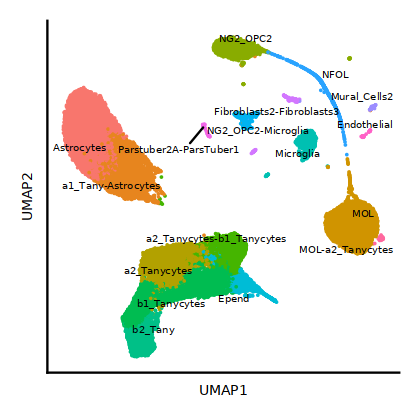

In [16]:
options(repr.plot.width=3.5, repr.plot.height=3.5)
umap_other = DimPlot(xe_obj, pt.size= 0.0001, reduction = "umap", group.by = "labels", label = TRUE, repel = TRUE, raster=FALSE, label.size=2) +
theme(legend.position = "none")  +
labs(title = "Molecular cartography cells on snRNA-seq UMAP",
     x = 'UMAP1', y='UMAP2') + 
theme(plot.title = element_blank(),
#       plot.title = element_text(size = 8),
      axis.title.y = element_text(size=8),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.title.x = element_text(size=8),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank())
umap_other

In [17]:
layout <- '
AB
'
ggp = wrap_plots(A = umap_other,
                 B = umap_neuron,
        design = layout) +
    plot_layout(guides = 'collect') #& 

# plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp %>% ggsave("snRNA_umap_plots.pdf", ., width = 7.5, height = 3.5)